In [1]:
import pandas as pd
import pickle
import json
import os

from ccdc.io import MoleculeWriter

In [4]:
with open('results/random_split_0_new_pdbbind/conf_results.p', 'rb') as f :
    results = pickle.load(f)

In [7]:
#results['NC(=O)c1cccn2c(-c3cccnc3)cnc12']

In [8]:
with open('data/raw/ccdc_generated_conf_ensemble_library.p', 'rb') as f :
    cel = pickle.load(f)

In [9]:
def get_pdb_ids(smiles, cel) :
    try :
        mol = cel.get_conf_ensemble(smiles).mol
        pdb_ids = [conf.GetProp('PDB_ID') for conf in mol.GetConformers()]
        return list(set(pdb_ids))
    except :
        return list(set())

In [10]:
test_set_pdbs = []
for smiles in results :
    pdb_ids = get_pdb_ids(smiles, cel)
    results[smiles]['PDB_ID'] = str(pdb_ids)
    test_set_pdbs.extend(pdb_ids)

In [13]:
len(set(test_set_pdbs))

1299

In [14]:
pdbbind_general_dir = '../PDBBind/PDBbind_v2020_other_PL/v2020-other-PL/'
pdbbind_refined_dir = '../PDBBind/PDBbind_v2020_refined/refined-set/'

In [15]:
widths = [6,6,7,6,17,9,200]
cols = 'PDB code, resolution, release year, -logKd/Ki, Kd/Ki, reference, ligand name'.replace(', ', ',').split(',')
pl_data = pd.read_fwf(os.path.join(pdbbind_general_dir, 'index', 'INDEX_general_PL_data.2020'), widths=widths,skiprows=6,header=None)
pl_data.columns=cols

In [16]:
widths = [6,6,8,200]
cols = 'PDB code, release year, Uniprot ID, protein name'.replace(', ', ',').split(',')
pl_name = pd.read_fwf(os.path.join(pdbbind_general_dir, 'index', 'INDEX_general_PL_name.2020'), widths=widths,skiprows=6,header=None)
pl_name.columns=cols

In [17]:
pl_all = pl_data.merge(pl_name, on='PDB code')

In [20]:
pl_all.head(1)

,PDB code,resolution,release year_x,-logKd/Ki,Kd/Ki,reference,ligand name,release year_y,Uniprot ID,protein name
0,3zzf,2.20,2012,0.4,Ki=400mM //,3zzf.pdf,(NLG),2012,Q01217,ACETYLGLUTAMATE KINASE


In [67]:
jak2_actives = pl_all[(pl_all['protein name'].str.contains('JAK2'))
      & (pl_all['-logKd/Ki'] > 8.5) & (pl_all['resolution'].str.replace('NMR', '0').astype(float) <= 2)]

In [75]:
pl_all[(pl_all['protein name'].str.contains('CATHEPSIN L'))]

,PDB code,resolution,release year_x,-logKd/Ki,Kd/Ki,reference,ligand name,release year_y,Uniprot ID,protein name
9155,3h8b,1.80,2009,6.29,Ki=0.511uM //,3h89.pdf,(NSY),2009,P07711,CATHEPSIN L1
9895,2xu4,1.12,2011,6.47,IC50=0.34uM //,2xu1.pdf,(DJT),2011,P07711,CATHEPSIN L1
11200,2xu3,0.90,2011,6.80,IC50=0.16uM //,2xu1.pdf,(XU3),2011,P07711,CATHEPSIN L1
11257,3bc3,2.20,2008,6.81,Ki=0.155uM //,3bc3.pdf,(OPT),2008,P07711,CATHEPSIN L
11395,5mae,1.00,2017,6.84,Ki=146nM //,5mae.pdf,(7KN),2017,P07711,CATHEPSIN L1
11539,2xu5,1.60,2011,6.89,IC50=0.13uM //,2xu1.pdf,(XU5),2011,P07711,CATHEPSIN L1
12017,2yj9,1.35,2011,7.02,IC50=0.095uM //,2yj2.pdf,(YJ9),2011,P07711,CATHEPSIN L1
12018,2yjb,1.40,2011,7.02,IC50=0.095uM //,2yj2.pdf,(YJ9),2011,P07711,CATHEPSIN L1
12344,5mqy,1.13,2017,7.11,Ki=0.077uM //,5mqy.pdf,(GH4),2017,P07711,CATHEPSIN L1
13251,1mhw,1.90,2002,7.35,Ki=45nM //,1mhw.pdf,(5-mer),2002,P07711,CATHEPSIN L


In [68]:
jak2_pdbs = jak2_actives['PDB code'].values

In [69]:
jak2_pdbs

array(['4bbf', '5cf8', '2b7a', '4aqc', '4jia', '3krr'], dtype=object)

In [70]:
test_set_jak2 = [pdb for pdb in jak2_pdbs if pdb in test_set_pdbs]

In [71]:
test_set_jak2

[]

In [34]:
pdb_id = '5ut6'
for i in table.index :
    smiles = table.loc[i, 'Unnamed: 0']
    pdb_ids = get_pdb_ids(smiles, cel)
    if pdb_id in pdb_ids :
        mol = cel.get_conf_ensemble(smiles).mol

NameError: name 'table' is not defined

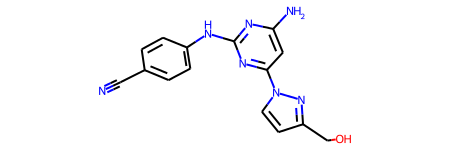

In [143]:
mol

In [35]:
from ccdc.protein import Protein
from ccdc.io import MoleculeReader

In [36]:
general_pdb_ids = os.listdir(pdbbind_general_dir)
refined_pdb_ids = os.listdir(pdbbind_refined_dir)

In [72]:
with MoleculeWriter(f'jak2_ligands_aligned.mol2') as writer:
    for i, pdb_id in enumerate(jak2_pdbs) :
        if pdb_id in general_pdb_ids :
            protein_path = os.path.join(pdbbind_general_dir, pdb_id, f'{pdb_id}_protein.pdb')
            ligand_path = os.path.join(pdbbind_general_dir, pdb_id, f'{pdb_id}_ligand.mol2')
        else :
            protein_path = os.path.join(pdbbind_refined_dir, pdb_id, f'{pdb_id}_protein.pdb')
            ligand_path = os.path.join(pdbbind_refined_dir, pdb_id, f'{pdb_id}_ligand.mol2')
        ligand = MoleculeReader(ligand_path)[0]
        if i == 0 :
            protein1 = Protein.from_file(protein_path)
            writer.write(ligand)
        else :
            protein2 = Protein.from_file(protein_path)
            chain_superposition = Protein.ChainSuperposition()
            (rmsd, transformation) = chain_superposition.superpose(protein1.chains[0], protein2.chains[0])
            print(rmsd)
            ligand.transform(transformation)
            writer.write(ligand)

0.3908125575343422
0.45234766848304137
0.4936544261363699
0.5462973007710156
0.5146101494862991


In [73]:
with MoleculeWriter(f'jak2_protein_aligned.pdb') as protein_writer:
    for i, pdb_id in enumerate(jak2_pdbs) :
        if pdb_id in general_pdb_ids :
            path = os.path.join(pdbbind_general_dir, pdb_id, f'{pdb_id}_protein.pdb')
        else :
            path = os.path.join(pdbbind_refined_dir, pdb_id, f'{pdb_id}_protein.pdb')
        if i == 0 :
            protein1 = Protein.from_file(path)
            print("Protein has {} chains and {} residues.".format(len(protein1.chains),len(protein1.residues)))
            protein_writer.write(protein1)
        else :
            protein2 = Protein.from_file(path)
            print("Protein has {} chains and {} residues.".format(len(protein2.chains),len(protein2.residues)))
            chain_superposition = Protein.ChainSuperposition()
            (rmsd, transformation) = chain_superposition.superpose(protein1.chains[0], protein2.chains[0])
            protein_writer.write(protein2)

Protein has 1 chains and 288 residues.
Protein has 1 chains and 287 residues.
Protein has 1 chains and 286 residues.
Protein has 1 chains and 291 residues.
Protein has 1 chains and 300 residues.
Protein has 1 chains and 293 residues.


In [73]:
for i, pdb_id in enumerate(test_set_jak2) :
    if pdb_id in general_pdb_ids :
        path = os.path.join(pdbbind_general_dir, pdb_id, f'{pdb_id}_protein.pdb')
    else :
        path = os.path.join(pdbbind_refined_dir, pdb_id, f'{pdb_id}_protein.pdb')
    if i == 0 :
        protein1 = Protein.from_file(path)
        print("Protein has {} chains and {} residues.".format(len(protein1.chains),len(protein1.residues)))
        with MoleculeWriter(f'{pdb_id}_aligned.pdb') as protein_writer:
            protein_writer.write(protein1)
    else :
        protein2 = Protein.from_file(path)
        print("Protein has {} chains and {} residues.".format(len(protein2.chains),len(protein2.residues)))
        chain_superposition = Protein.ChainSuperposition()
        (rmsd, transformation) = chain_superposition.superpose(protein1.chains[0], protein2.chains[0])
        #protein2.transform(transformation)
        with MoleculeWriter(f'{pdb_id}_aligned.pdb') as protein_writer:
            protein_writer.write(protein2)

Protein has 1 chains and 272 residues.
Protein has 1 chains and 277 residues.
Protein has 1 chains and 286 residues.
Protein has 1 chains and 285 residues.
Protein has 1 chains and 292 residues.


In [61]:
print("Protein has {} chains and {} residues.".format(len(protein1.chains),len(protein1.residues)))

Protein has 1 chains and 272 residues.


In [62]:
print("Protein has {} chains and {} residues.".format(len(protein2.chains),len(protein2.residues)))

Protein has 1 chains and 292 residues.


In [63]:
chain_superposition = Protein.ChainSuperposition()
(rmsd, transformation) = chain_superposition.superpose(protein1.chains[0], protein2.chains[0])

In [65]:
transformation

Molecule.Transformation(Rotation: ((-0.028474905115391413, -0.3230093412430103, 0.9459673066488219), (0.5505887508195584, -0.7949205257060925, -0.25485954030035496), (0.8342908409239715, 0.5135818564561121, 0.20048059624179537)) Translation: (-40.41077865500128, -3.2316097138001183, 52.73123480039596))

In [66]:
protein2.transform(transformation)

In [68]:
from ccdc.io import MoleculeWriter
with MoleculeWriter(f'{pdb_id}_aligned.pdb') as protein_writer:
    protein_writer.write(protein2)

# Pharmacophore done with python

In [154]:
from ccdc.pharmacophore import Pharmacophore
pharmacophore_path = '../pharmacophore_maestro/model.cm'
catl_s3_query = Pharmacophore.Query.from_file(pharmacophore_path)

In [155]:
features = catl_s3_query.features

In [156]:
print(len(features))

8


In [157]:
print('\n'.join(str(f) for f in features))

Feature(ring)
Feature(ring)
Feature(ring_planar_projected)
Feature(ring_planar_projected)
Feature(ring_planar_projected)
Feature(ring_planar_projected)
Feature(acceptor_projected)
Feature(acceptor)


In [105]:
keys = list(Pharmacophore.feature_definitions.keys())

In [106]:
print('\n'.join(keys)) 

In [151]:
settings = Pharmacophore.Search.Settings()
settings.max_hit_structures = 20
settings.max_hits_per_structure = 1
settings.max_hit_rmsd = 2.0
searcher = Pharmacophore.Search(settings)

In [158]:
feature_db_file = 'out.feat'
feature_db = Pharmacophore.FeatureDatabase.from_file(feature_db_file)

In [159]:
hits = searcher.search(catl_s3_query, database=feature_db)
h = hits[0]

In [160]:
h.molecule

In [161]:
points = h.points

In [162]:
donor_projected_points = h.feature_points(catl_s3_query.features[1])

In [163]:
for dc, val in zip(catl_s3_query.distance_constraints, h.constraint_values()): 
    print('(%d, %d) (%d, %d) %.3f' % (dc.feature_point1[0], dc.feature_point1[1], dc.feature_point2[0], dc.feature_point2[1], val))

(1, 0) (0, 0) 2.114
(2, 0) (0, 0) 0.000
(2, 1) (0, 0) 2.800
(2, 0) (1, 0) 2.114
(2, 1) (1, 0) 3.513
(3, 0) (0, 0) 0.000
(3, 1) (0, 0) 2.800
(3, 0) (1, 0) 2.114
(3, 1) (1, 0) 3.504
(3, 0) (2, 0) 0.000
(3, 0) (2, 1) 2.800
(3, 1) (2, 0) 2.800
(3, 1) (2, 1) 5.600
(4, 0) (0, 0) 2.114
(4, 1) (0, 0) 3.512
(4, 0) (1, 0) 0.000
(4, 1) (1, 0) 2.800
(4, 0) (2, 0) 2.114
(4, 0) (2, 1) 3.513
(4, 1) (2, 0) 3.512
(4, 1) (2, 1) 2.127
(4, 0) (3, 0) 2.114
(4, 0) (3, 1) 3.504
(4, 1) (3, 0) 3.512
(4, 1) (3, 1) 5.985
(5, 0) (0, 0) 2.114
(5, 1) (0, 0) 3.505
(5, 0) (1, 0) 0.000
(5, 1) (1, 0) 2.800
(5, 0) (2, 0) 2.114
(5, 0) (2, 1) 3.513
(5, 1) (2, 0) 3.505
(5, 1) (2, 1) 5.986
(5, 0) (3, 0) 2.114
(5, 0) (3, 1) 3.504
(5, 1) (3, 0) 3.505
(5, 1) (3, 1) 2.100
(5, 0) (4, 0) 0.000
(5, 0) (4, 1) 2.800
(5, 1) (4, 0) 2.800
(5, 1) (4, 1) 5.600
(6, 0) (0, 0) 2.525
(6, 1) (0, 0) 4.656
(6, 0) (1, 0) 1.423
(6, 1) (1, 0) 4.223
(6, 0) (2, 0) 2.525
(6, 0) (2, 1) 3.774
(6, 1) (2, 0) 4.656
(6, 1) (2, 1) 5.441
(6, 0) (3, 0) 2.525
